### Twitter Dataset
## 1 Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
result = pd.DataFrame()
desired_columns=['name','username','features','likes_count','retweets_count','replies_count','tweet']
with pd.read_json('twitter_features.json', lines=True, chunksize=20000) as reader:
    reader
    for chunk in reader:
        chunk = chunk[desired_columns]
        result = pd.concat([result, chunk], ignore_index=True)
        print(result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            20000 non-null  object
 1   username        20000 non-null  object
 2   features        20000 non-null  object
 3   likes_count     20000 non-null  int64 
 4   retweets_count  20000 non-null  int64 
 5   replies_count   20000 non-null  int64 
 6   tweet           20000 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            40000 non-null  object
 1   username        40000 non-null  object
 2   features        40000 non-null  object
 3   likes_count     40000 non-null  int64 
 4   retweets_count  40000 non-null  int64 
 5   replies_count   4000

In [3]:
result.head()

,name,username,features,likes_count,retweets_count,replies_count,tweet
0,Barack Obama,barackobama,"[0.032840799999999996, 0.279632999999999, 0.30...",314,1698,111,JoeBiden The people I grew up with and my neig...
1,Barack Obama,barackobama,"[-0.1898005, 0.23507037500000003, 0.49903625, ...",566,2252,98,VP Biden War should always be the absolute las...
2,Barack Obama,barackobama,"[-0.094298928571428, 0.136600214285714, 0.4788...",217,748,212,VP Biden on Iran These are the most crippling ...
3,Barack Obama,barackobama,"[-0.1626531, 0.21753979999999998, 0.3880757999...",103,531,83,Watch live JoeBiden lays out the ObamaBiden pl...
4,Barack Obama,barackobama,"[-0.30785029999999997, 0.2269174, 0.2245550999...",66,257,46,Be sure to follow OFADebates during tonights V...


In [4]:
print(len(result.groupby('name').size().loc[(result.groupby('name').size()>10000).values]))
result.groupby('name').size().loc[(result.groupby('name').size()>10000).values].sort_values()

12


name
Gov Mike Huckabee    11022
Andrew Yang          11087
Marco Rubio          11957
Amy Klobuchar        12008
Bernie Sanders       14201
Elizabeth Warren     14596
Ted Cruz             15201
Newt Gingrich        15489
Chuck Schumer        18513
Andrew Cuomo         22324
Donna Brazile        35426
Cory Booker          48228
dtype: int64

In [5]:
noisy_politicians=['Gov Mike Huckabee','Andrew Yang','Marco Rubio','Amy Klobuchar']
df = result.loc[result.name.isin(noisy_politicians)].reset_index().drop(columns='index')
df.head()

,name,username,features,likes_count,retweets_count,replies_count,tweet
0,Amy Klobuchar,amyklobuchar,"[-0.06547308, 0.23435812500000003, 0.317667025...",508,49,29,Selflessness Bravery Honor These are some of t...
1,Amy Klobuchar,amyklobuchar,"[-0.045452258064516006, 0.21574387096774103, 0...",975,158,102,My bipartisan bill would help reduce the chanc...
2,Amy Klobuchar,amyklobuchar,"[0.059142696969696006, 0.14052175757575702, 0....",1052,107,69,Yesterday POTUS signed the COVID19 Hate Crimes...
3,Amy Klobuchar,amyklobuchar,"[-0.12832085714285701, 0.23951678214285702, 0....",469,115,36,Weve made incredible progress more than 60 of ...
4,Amy Klobuchar,amyklobuchar,"[-0.14175184074074001, 0.18592448148148102, 0....",7991,885,444,The Cold War is over and living in the past is...


In [6]:
## creating the icml dataset
l = df.features.tolist()
icml_data = pd.DataFrame(l,columns=[i for i in range(len(df.features[1]))])
icml_data['username'] = df['username'].reset_index().drop(columns='index')
icml_data.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,username
0,-0.065473,0.234358,0.317667,-0.256871,-0.142976,0.210276,-0.266028,0.138108,-0.254416,-0.013410,...,-0.000065,0.598750,0.246725,0.487500,0.288585,1,1.000000,3.099531,0.000000,amyklobuchar
1,-0.045452,0.215744,0.067186,-0.123290,0.055874,-0.053640,-0.327975,0.118830,-0.056642,0.092657,...,-0.000073,0.559834,0.230376,0.483871,0.288525,1,1.000000,3.039450,0.000000,amyklobuchar
2,0.059143,0.140522,0.309735,-0.243246,0.100499,0.347957,-0.221372,0.091050,-0.054086,-0.010116,...,0.046074,0.629936,0.223648,0.484848,0.288543,1,1.000000,3.365904,0.000000,amyklobuchar
3,-0.128321,0.239517,0.345812,-0.254794,-0.076776,0.232765,-0.129860,0.149611,-0.163519,0.063107,...,-0.000624,0.642857,0.242038,0.482143,0.288491,2,0.964286,3.435713,0.035714,amyklobuchar
4,-0.141752,0.185924,0.432374,-0.139284,0.032730,0.098419,-0.248103,0.203808,-0.139779,-0.011322,...,-0.001028,0.729767,0.225133,0.481481,0.288477,1,1.000000,3.723224,0.000000,amyklobuchar


In [7]:
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

In [8]:
le = preprocessing.LabelEncoder()

In [9]:
%%time

X_ = df['tweet']
y_ = le.fit_transform(df['username']) 

pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer()), 
                 ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71      4035
           1       0.72      0.63      0.67      3641
           2       0.84      0.51      0.63      3647
           3       0.57      0.76      0.65      3882

    accuracy                           0.67     15205
   macro avg       0.70      0.67      0.67     15205
weighted avg       0.69      0.67      0.67     15205

CPU times: user 3.65 s, sys: 44.4 ms, total: 3.69 s
Wall time: 1.75 s


In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

Confusion matrix, without normalization
[[2350  657  528  500]
 [ 402 2621  272  346]
 [ 476  399 2322  450]
 [ 584  674  419 2205]]
Normalized confusion matrix
[[0.58240397 0.16282528 0.13085502 0.12391574]
 [0.11040923 0.71985718 0.07470475 0.09502884]
 [0.13051823 0.10940499 0.63668769 0.12338909]
 [0.15043792 0.17362184 0.10793405 0.56800618]]


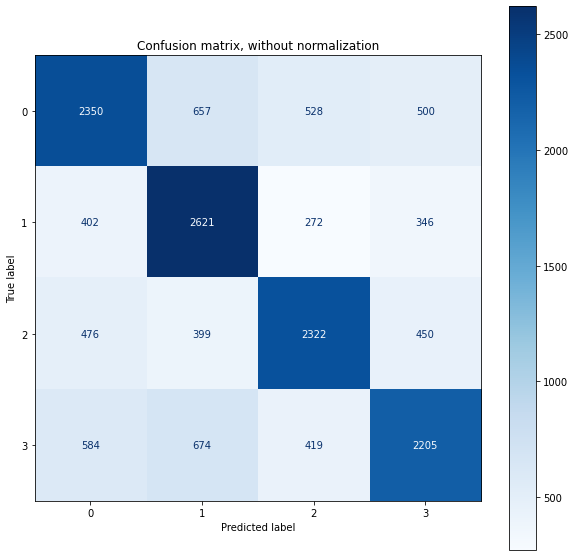

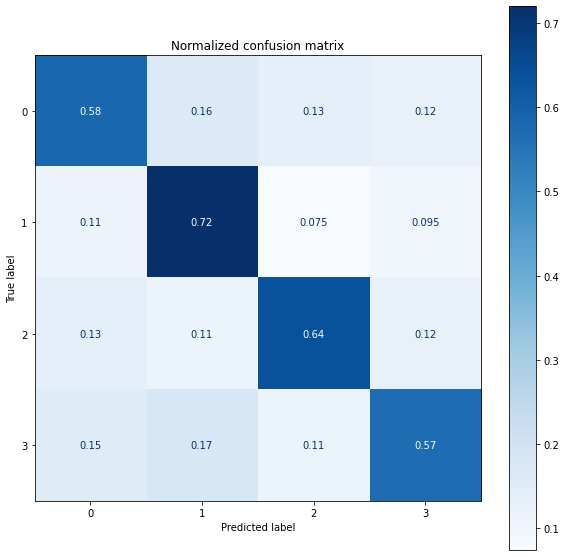

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

#class_names= ['dem','rep']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

X_ =  icml_data.iloc[:,0:119]
y_ = le.fit_transform(icml_data['username'])

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)

In [23]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60      4035
           1       0.59      0.71      0.65      3641
           2       0.66      0.63      0.64      3647
           3       0.63      0.55      0.59      3882

    accuracy                           0.62     15205
   macro avg       0.62      0.62      0.62     15205
weighted avg       0.62      0.62      0.62     15205



Confusion matrix, without normalization
[[2373  664  510  488]
 [ 427 2596  272  346]
 [ 483  420 2313  431]
 [ 597  711  436 2138]]
Normalized confusion matrix
[[0.58810409 0.1645601  0.12639405 0.12094176]
 [0.11727547 0.71299094 0.07470475 0.09502884]
 [0.13243762 0.11516315 0.63421991 0.11817933]
 [0.15378671 0.18315301 0.11231324 0.55074704]]


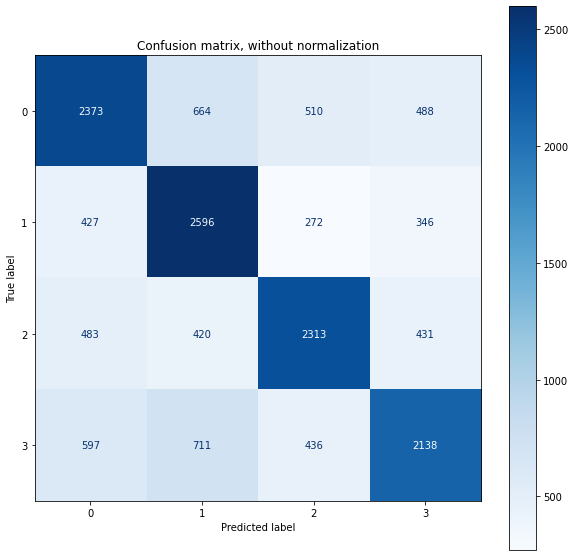

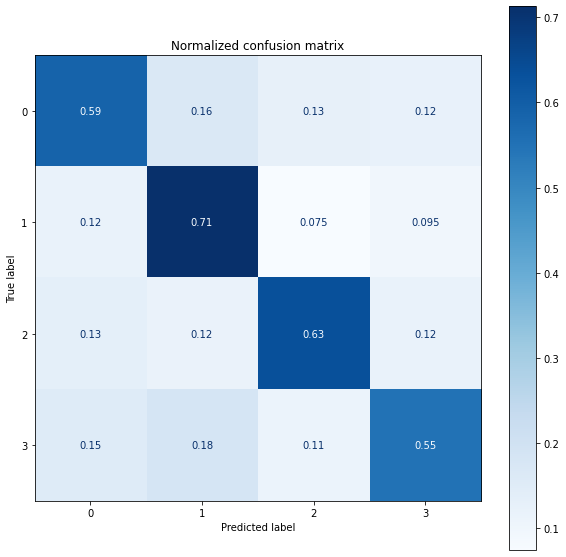

In [24]:
#class_names= ['dem','rep']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()